In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
import scipy.interpolate as spi
import math
import matplotlib.figure as fig
from scipy import stats

In [3]:
data1 = pd.read_csv("../FilesEj1/OutputEj1_1.csv")
data2 = pd.read_csv("../FilesEj1/OutputEj1_2.csv")
data3 = pd.read_csv("../FilesEj1/OutputEj1_3.csv")
data4 = pd.read_csv("../FilesEj1/OutputEj1_4.csv")

0.1


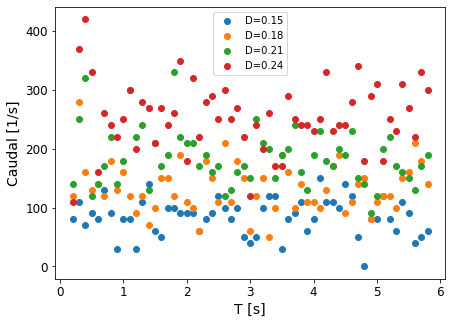

In [44]:
dt = data1['Dt'][1]
print(dt)

counts1 = data1['N']/dt
counts2 = data2['N']/dt
counts3 = data3['N']/dt
counts4 = data4['N']/dt
counts1 = counts1[2:-1:1]
counts2 = counts2[2:-1:1]
counts3 = counts3[2:-1:1]
counts4 = counts4[2:-1:1]

parameters = {'xtick.labelsize': 12,'ytick.labelsize': 12, 'axes.labelsize': 14}
plt.rcParams.update(parameters)
plt.figure(figsize=(7,5))
plt.scatter(data1['Dt'][2:-1:1], counts1, label = "D=0.15")
plt.scatter(data2['Dt'][2:-1:1], counts2, label = "D=0.18")
plt.scatter(data3['Dt'][2:-1:1], counts3, label = "D=0.21")
plt.scatter(data4['Dt'][2:-1:1], counts4, label = "D=0.24")
plt.xlabel("T [s]")
plt.ylabel("Caudal [1/s]")
plt.legend()


In [31]:
#calcular los promedios de caudales para cada D
def get_values(array):
    caudal_promedio = array.mean()
    max = array.max()
    min = array.min()
    return caudal_promedio, max, min

84.3859649122807
133.859649122807
184.91228070175438
254.56140350877192


Text(0, 0.5, 'Caudal [1/s]')

<Figure size 504x360 with 0 Axes>

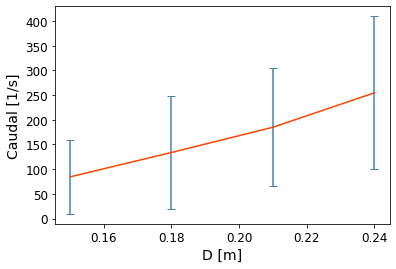

In [45]:
cp1, max1, min1 = get_values(counts1)
cp2, max2, min2 = get_values(counts2)
cp3, max3, min3 = get_values(counts3)
cp4, max4, min4 = get_values(counts4)
print(cp1)
print(cp2)
print(cp3)
print(cp4)
array_x = [0.15, 0.18, 0.21, 0.24]
array_y = [cp1, cp2, cp3, cp4]
y_errs = [max1-min1, max2-min2, max3-min3, max4-min4]
parameters = {'xtick.labelsize': 12,'ytick.labelsize': 12, 'axes.labelsize': 14}
plt.rcParams.update(parameters)
plt.figure(figsize=(7,5))
plt.subplots()
plt.errorbar(np.array(array_x), np.array(array_y), yerr=np.array(y_errs)/2, capsize=4, color="orangered", ecolor="steelblue")
plt.xlabel("D [m]")
plt.ylabel("Caudal [1/s]")

In [33]:
def getMinTime(array_t, array_n):
    for i in range(len(array_n)):
        if array_n[i]/dt > cp1:
            return array_t[i]

In [10]:
def getBeverloo(c, i):
    np = 300/0.4
    return np * math.sqrt(9.8) * (array_x[i] - (c * 0.0124))**1.5

2.0790000000001116


Text(0, 0.5, 'ECM')

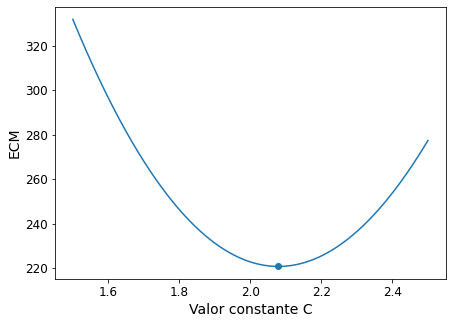

In [46]:
Ds = []
ecm = []
c = []
min_sum = 99999999999
min_C = 0
paso = 1/10000
i = 1.5
while i<2.5:
    c.append(i)
    sum = 0
    for j in range(len(array_x)):
        # sum += (array_y[j] - (2 *(array_x[j] / 1000) * paso * i))**2
        sum += (array_y[j] - getBeverloo(i, j))**2
    sum = sum/4
    ecm.append(sum)
    if sum < min_sum:
        min_sum = sum
        min_C = i
    i+=paso
print(min_C)

parameters = {'xtick.labelsize': 12,'ytick.labelsize': 12, 'axes.labelsize': 14}
plt.rcParams.update(parameters)
plt.figure(figsize=(7,5))
plt.plot(c, ecm)
plt.xlabel("C")
plt.ylabel("E(C)")
plt.scatter([min_C], [min_sum])
plt.xlabel("Valor constante C")
plt.ylabel("ECM")